In [35]:
#Python version
import sys
print(sys.version)

#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.preprocessing import LabelEncoder 
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

3.7.3 (default, Mar 27 2019, 22:11:17) 
[GCC 7.3.0]


In [36]:
#Importing Dataset

df = pd.read_csv("dataset/winequality-red.csv")
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [37]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [38]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [39]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [40]:
print(df.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [41]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [42]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

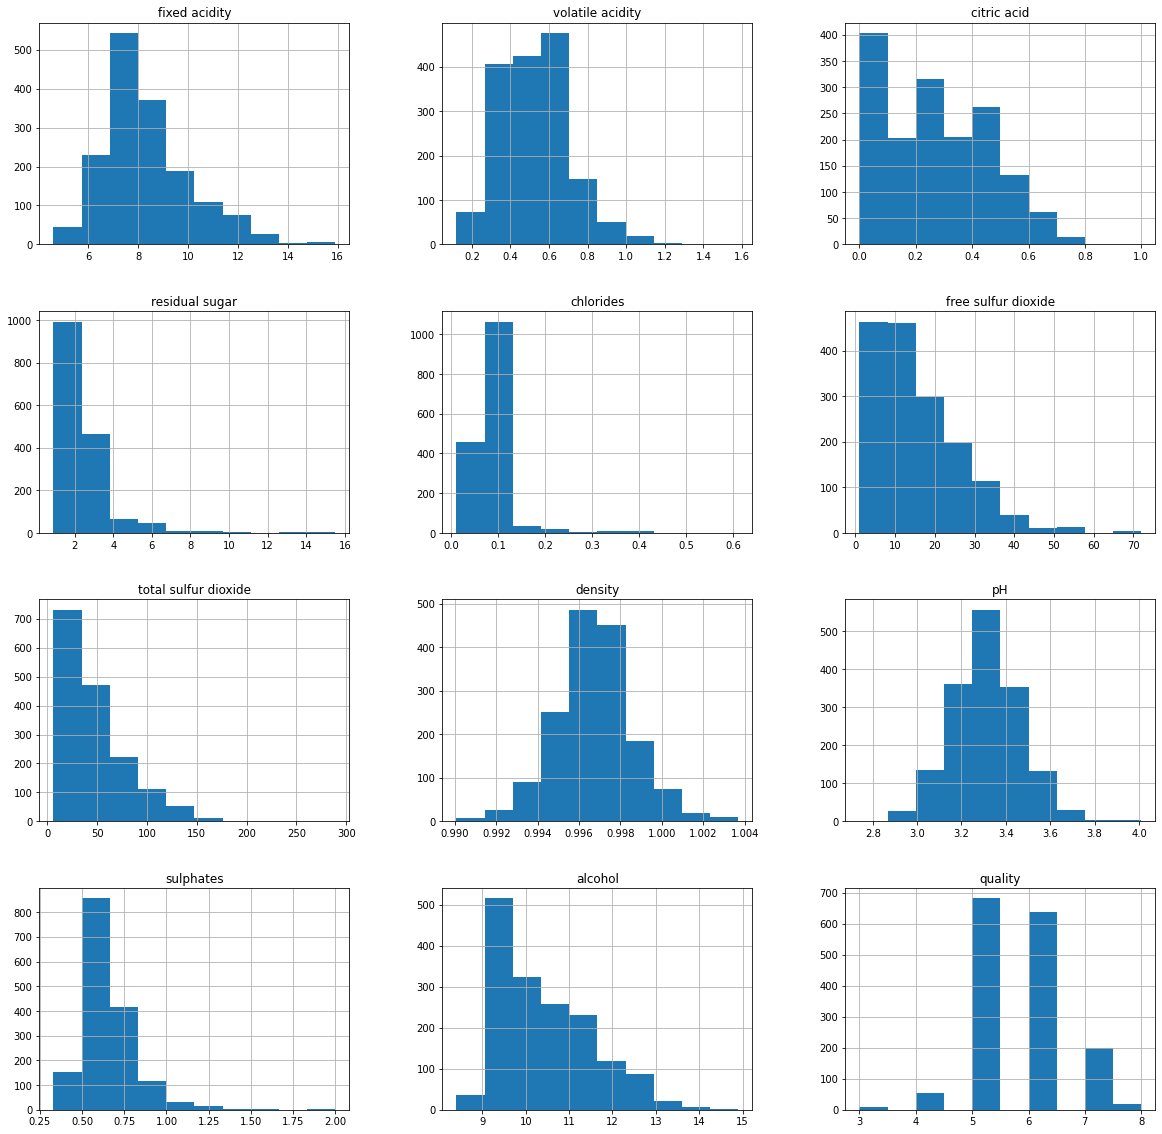

In [43]:
df.hist(figsize=(20,20))

In [44]:
my_tab = pd.crosstab(index=df['quality'], columns="Count")
my_tab = my_tab.sort_values('Count', ascending=[False])
print(my_tab)

col_0    Count
quality       
5          681
6          638
7          199
4           53
8           18
3           10


<AxesSubplot:xlabel='col_0'>

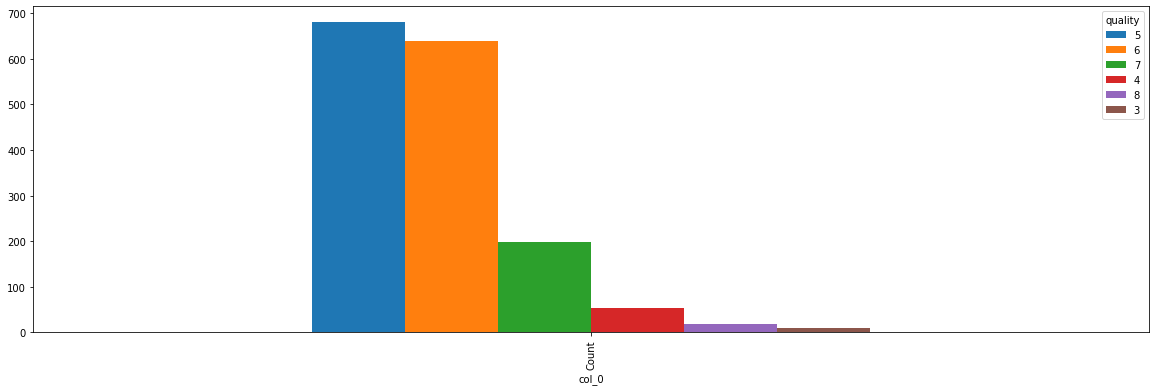

In [45]:
data_counts = pd.DataFrame(my_tab)
pd.DataFrame(data_counts).transpose().plot(kind='bar', figsize=(20,6), stacked=False)

In [46]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


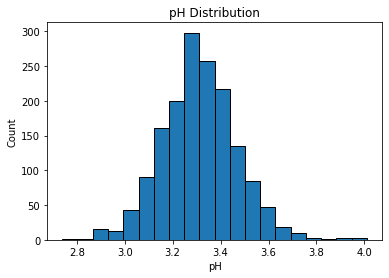

In [47]:
# Histogram Plot of Site EUI

plt.hist(df['pH'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('pH'); 
plt.ylabel('Count'); plt.title('pH Distribution');

In [48]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [49]:
df.shape

(1599, 12)

In [50]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

columns_to_scale = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [52]:
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,5
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,5


In [53]:
y = df['quality']
X = df.drop(['quality'], axis = 1)

In [54]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [55]:
from collections import Counter

counter = Counter(y)
print(counter)

Counter({5: 681, 6: 681, 7: 681, 4: 681, 8: 681, 3: 681})


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

X = shuffle(X, random_state=0)
y = shuffle(y, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 3268 samples.
Testing set has 818 samples.


In [57]:
#Model Building

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [58]:
seed = 700
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RFC', RandomForestClassifier()))
models.append(('NN', MLPClassifier()))

In [59]:
results = []
names = []

scoring = 'accuracy'

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

In [60]:
for name, model in models:
    kfold = model_selection.KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s:     %f      (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR:     0.564251      (0.041153)
LDA:     0.538211      (0.040994)
KNN:     0.791626      (0.029352)
CART:     0.786419      (0.023712)
NB:     0.499680      (0.037395)
SVM:     0.717827      (0.040663)
RFC:     0.875166      (0.021518)
NN:     0.691233      (0.042571)


In [61]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

final_model = RandomForestClassifier()

final_model.fit(X_train,y_train)

y_pred = final_model.predict(X_test)

#y_test = np.argmax(y_test, axis=0)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
#print(roc_auc_score(y_test, y_pred, multi_class = 'ovr'))

[[136   0   0   0   0   0]
 [  0 131   4   0   0   0]
 [  0   5 112  27   2   0]
 [  0   3  21  75  25   2]
 [  0   3   1   5 128   0]
 [  0   0   0   0   1 137]]
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       136
           4       0.92      0.97      0.95       135
           5       0.81      0.77      0.79       146
           6       0.70      0.60      0.64       126
           7       0.82      0.93      0.87       137
           8       0.99      0.99      0.99       138

    accuracy                           0.88       818
   macro avg       0.87      0.88      0.87       818
weighted avg       0.88      0.88      0.88       818



In [62]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,), [100]*5],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.0004, 0.0005, 0.05],
    'learning_rate': ['constant','adaptive']
}

In [63]:
from sklearn.model_selection import GridSearchCV

mlp = MLPClassifier(max_iter=100, random_state=1)

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)

clf.fit(X, y)

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=100, random_state=1),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.0004, 0.0005, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,),
                                                [100, 100, 100, 100, 100]],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [64]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': [100, 100, 100, 100, 100], 'learning_rate': 'constant', 'solver': 'adam'}


In [65]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

In [67]:
y_true, y_pred = y_test , clf.predict(X_test)

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

print(confusion_matrix(y_true, y_pred))

print('Results on the test set:')
print(classification_report(y_true, y_pred))
#print(roc_auc_score(y_test, y_pred))

[[136   0   0   0   0   0]
 [  0 134   1   0   0   0]
 [  1   2 122  18   3   0]
 [  0   2  11  99  11   3]
 [  0   0   1   7 129   0]
 [  0   0   0   0   1 137]]
Results on the test set:
              precision    recall  f1-score   support

           3       0.99      1.00      1.00       136
           4       0.97      0.99      0.98       135
           5       0.90      0.84      0.87       146
           6       0.80      0.79      0.79       126
           7       0.90      0.94      0.92       137
           8       0.98      0.99      0.99       138

    accuracy                           0.93       818
   macro avg       0.92      0.92      0.92       818
weighted avg       0.92      0.93      0.92       818



In [69]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [71]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [72]:
print('Best parameters found:\n', rf_random.best_params_)

Best parameters found:
 {'n_estimators': 1600, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': False}


In [73]:
y_true, y_pred = y_test , rf_random.predict(X_test)

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

print(confusion_matrix(y_true, y_pred))

print('Results on the test set:')
print(classification_report(y_true, y_pred))
#print(roc_auc_score(y_test, y_pred))

[[136   0   0   0   0   0]
 [  0 135   0   0   0   0]
 [  0   0 146   0   0   0]
 [  0   0   0 126   0   0]
 [  0   0   0   0 137   0]
 [  0   0   0   0   0 138]]
Results on the test set:
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       136
           4       1.00      1.00      1.00       135
           5       1.00      1.00      1.00       146
           6       1.00      1.00      1.00       126
           7       1.00      1.00      1.00       137
           8       1.00      1.00      1.00       138

    accuracy                           1.00       818
   macro avg       1.00      1.00      1.00       818
weighted avg       1.00      1.00      1.00       818



In [74]:
new = df.drop(['quality'], axis=1)
newColumns = list(new.columns)

In [76]:
model_columns = newColumns

import joblib

Final_Model = 'saved_model/Final-Model.sav'
joblib.dump(rf_random, Final_Model)

Model_columns = 'saved_model/Final-Model-Columns.sav'
joblib.dump(model_columns, Model_columns)

['saved_model/Final-Model-Columns.sav']